<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number =  99101643
Name = 'Sara'
Last_Name = 'Rezanezhad'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 12905571.81it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275975.50it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4910147.46it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3269080.54it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [34]:
# Number of classes in FashionMNIST
num_classes = 10

# Input dimension for the first layer (number of pixels in each image)
input_dim = 28 * 28  # 784

In [35]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

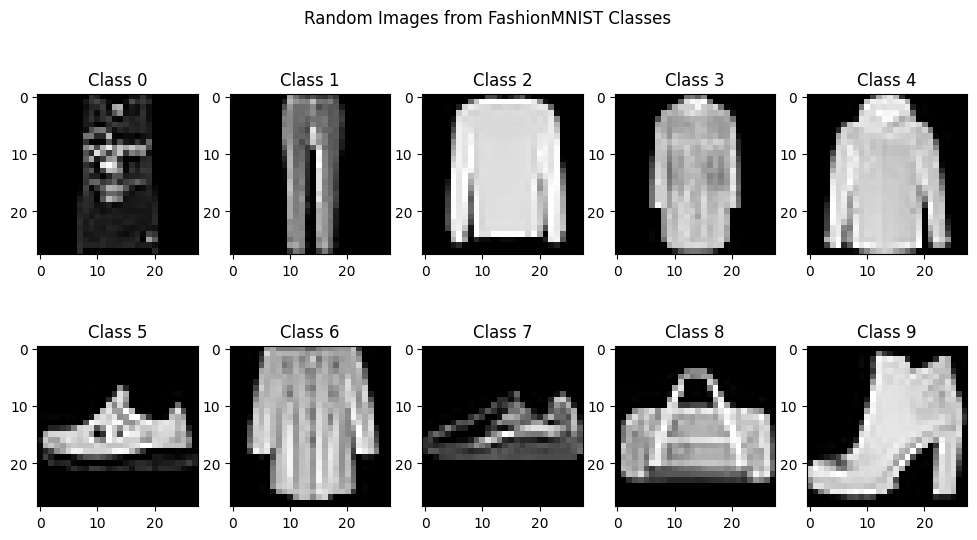

In [36]:
# Get one random image from each class
class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
random_images = []

for class_idx in class_indices:
    class_samples = test_set.targets == class_idx
    class_images = test_set.data[class_samples]
    random_image_idx = np.random.randint(len(class_images))
    random_image = class_images[random_image_idx]
    random_images.append(random_image)

# Create a 2x5 grid for displaying the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Random Images from FashionMNIST Classes")

for i, ax in enumerate(axs.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.set_title(f"Class {i}")
    #ax.axis('off')

plt.show()


## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [38]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [39]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [40]:
def affine_forward(x, w, b):
   x = x.float()  # Convert input x to float
   affine_output = torch.matmul(x, w) + b
   return affine_output

def relu(x):
  relu_output = torch.relu(affine_output)
  return relu_output

Function `model` returns output of the whole model for the input `x` using the parameters:

In [41]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    # Forward pass through each layer
    for i in range(num_layers):
        w_i = parameters[f'w{i}']
        b_i = parameters[f'b{i}']
        x = affine_forward(x, w_i, b_i)

    # Output of the last layer is the prediction
    output = x

    return output

Implementing cross entropy loss:

In [42]:
def cross_entropy_loss(scores, y):
    n = len(y)
    # Compute softmax probabilities
    probs = torch.softmax(scores, dim=1)
    # Gather the probabilities corresponding to the true labels
    true_probs = probs[range(n), y]
    # Compute the negative log-likelihood
    loss = -torch.log(true_probs).mean()

    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [43]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    for param in parameters.values():
        # Update parameters using gradient descent
        param.data -= learning_rate * param.grad
        # Zero out gradients
        param.grad.zero_()

Training functions:

In [44]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
  correct = (y_pred == y_true).sum()
  total = len(y_true)
  acc = correct / total
  return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        # Calculate the loss (you need to implement this part)
        loss = cross_entropy_loss(p, y)

        # Backpropagation and optimization
        loss.backward()
        sgd_optimizer(parameters, learning_rate)

        # Update train loss
        train_loss += loss.item()


        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [45]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [47]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        # Training loop
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation loop
        test_loss, test_acc = validate(test_loader, epoch, set_name='test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    # Plot loss history
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
    plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss History')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot accuracy history
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy History')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Final test accuracy: {test_accuracies[-1]}')

Accuracy of train set: 0.3999666666666667
Accuracy of test set: 0.5884666666666667
Accuracy of train set: 0.6472666666666667
Accuracy of test set: 0.6992
Accuracy of train set: 0.7295333333333334
Accuracy of test set: 0.7593833333333333
Accuracy of train set: 0.76875
Accuracy of test set: 0.7821333333333333
Accuracy of train set: 0.7882
Accuracy of test set: 0.79775
Accuracy of train set: 0.8046166666666666
Accuracy of test set: 0.81
Accuracy of train set: 0.8143166666666667
Accuracy of test set: 0.8187166666666666
Accuracy of train set: 0.8211666666666667
Accuracy of test set: 0.8162833333333334
Accuracy of train set: 0.8262833333333334
Accuracy of test set: 0.8286166666666667
Accuracy of train set: 0.83045
Accuracy of test set: 0.8327333333333333
Accuracy of train set: 0.8346333333333333
Accuracy of test set: 0.8378666666666666
Accuracy of train set: 0.8369833333333333
Accuracy of test set: 0.8387333333333333
Accuracy of train set: 0.84015
Accuracy of test set: 0.84365
Accuracy of tr

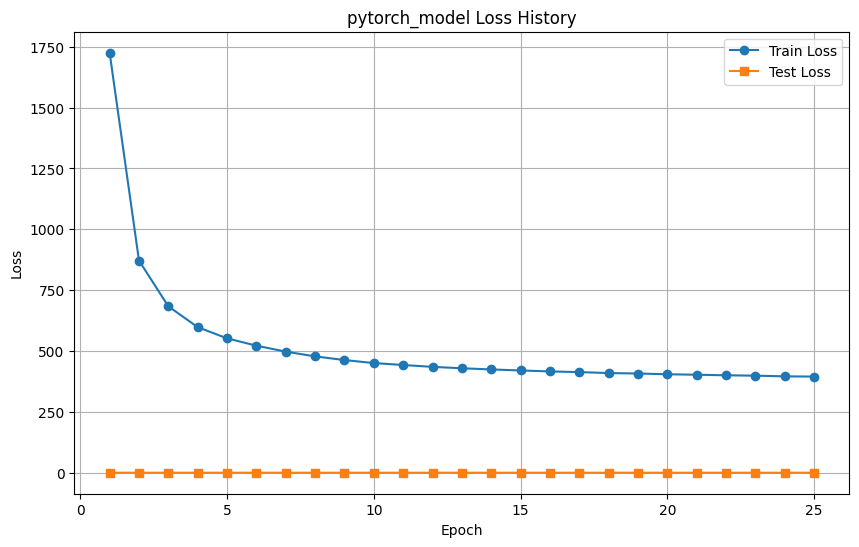

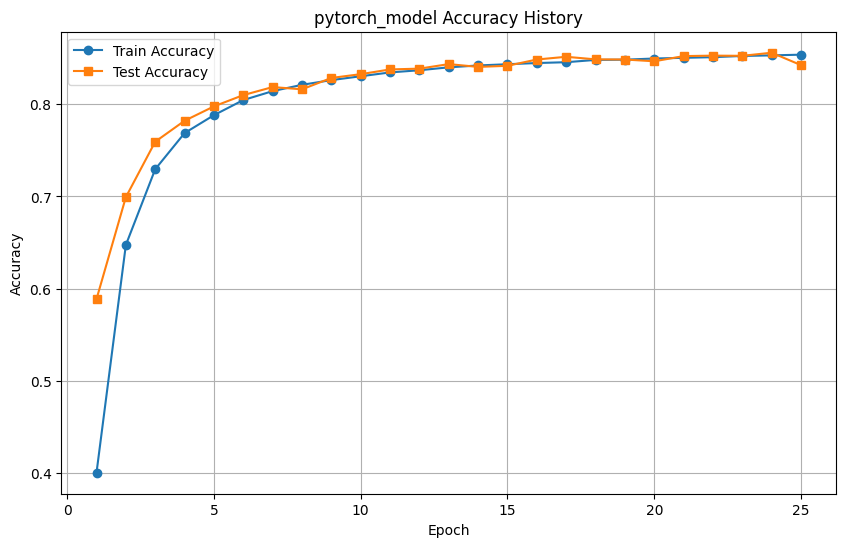

Final test accuracy: 0.8425166666666667


In [48]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [49]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8425166666666667


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

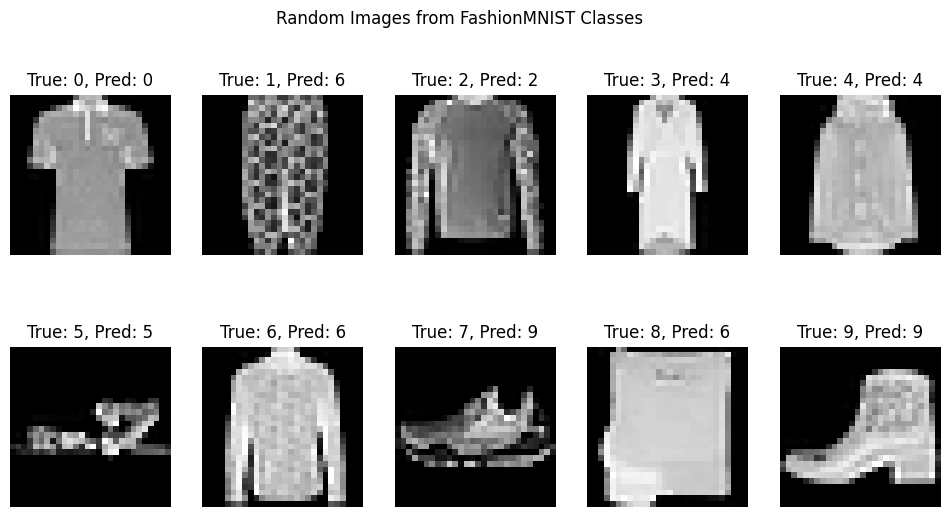

In [50]:

class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
random_images = []
true_labels = []
predicted_labels = []

for class_idx in class_indices:
    class_samples = test_set.targets == class_idx
    class_images = test_set.data[class_samples]
    random_image_idx = np.random.randint(len(class_images))
    random_image = class_images[random_image_idx]
    random_images.append(random_image)
    true_labels.append(class_idx)

# Predict labels for the random images
with torch.no_grad():
    random_images = torch.stack(random_images).to(device)
    predictions = model(random_images, parameters)
    predicted_labels = predictions.argmax(dim=-1).cpu().numpy()

# Create a 2x5 grid for displaying the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Random Images from FashionMNIST Classes")

for i, ax in enumerate(axs.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    ax.axis('off')

plt.show()
